# <center>Diabetes Disease Detection</center>

## Overview:
Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Glucose is your body’s main source of energy. Your body can make glucose, but glucose also comes from the food you eat. Insulin is a hormone made by the pancreas that helps glucose get into your cells to be used for energy. If you have diabetes, your body doesn’t make enough—or any—insulin, or doesn’t use insulin properly. Glucose then stays in your blood and doesn’t reach your cells. Diabetes raises the risk for damage to the eyes, kidneys, nerves, and heart. Diabetes is also linked to some types of cancer.

## Dataset Information:
PIMA Indian Dataset: [Kaggle - Diabetes Disease Detection](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

### Independent Feature:
* Outcome

### Dependent Feature:
* Pregnancies	
* Glucose	
* BloodPressure	
* SkinThickness	
* Insulin	
* BMI	
* DiabetesPedigreeFunction	
* Age

### Training : Testing :: 800 : 200 :: 80 : 20

### Evaluation Metrics Considered:
* Accuracy, Precision, Recision, F1 Score, ROC AUC Curve

# 1. Importing required libraries
* NumPy: For numerical computations and array manipulation.
* Pandas: For data manipulation and analysis.
* Seaborn: For statistical data visualization.
* Matplotlib: For creating plots and visualizations.
* Scikit-learn: For machine learning algorithms and evaluation metrics.
* XGBoost: For Extreme gradient boosting machine learning. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix


from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

from evidently import ColumnMapping
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset, TargetDriftPreset, ClassificationPreset, DataQualityPreset

# 2. Data Ingestion

In [2]:
df = pd.read_csv('Data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 3. Data Exploration

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# 4. Data Preprocessing

### 4.1 Data Sampling

In [9]:
df["Outcome"].value_counts()

class_0 = df[df["Outcome"]==0]
class_1 = df[df["Outcome"]==1]

In [10]:
class_0.shape

(500, 9)

In [11]:
class_1.shape

(268, 9)

In [12]:
df_n = class_1.sample(500, replace=True)
df = pd.concat([class_0, df_n], axis=0)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
604,4,183,0,0,0,28.4,0.212,36,1
642,6,147,80,0,0,29.5,0.178,50,1
695,7,142,90,24,480,30.4,0.128,43,1
480,3,158,70,30,328,35.5,0.344,35,1


In [13]:
df.shape

(1000, 9)

### 4.2 Feature Classification

In [14]:
categorical_columns = []
numerical_columns = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)

In [15]:
print("Numerical Features: ",numerical_columns)

print("\nCategorical Features: ",categorical_columns)

Numerical Features:  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Categorical Features:  []


In [16]:
discrete_features=[feature for feature in numerical_columns if len(df[feature].unique())<25]
discrete_features

['Pregnancies', 'Outcome']

In [17]:
continuous_features=[feature for feature in numerical_columns if feature not in discrete_features]
continuous_features

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

### 4.3 Training and Testing Data Preparation

In [18]:
x =  df.drop(columns=['Outcome'],axis=1)
y = df['Outcome']

In [19]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1,1,85,66,29,0,26.6,0.351,31
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
7,10,115,0,0,0,35.3,0.134,29
10,4,110,92,0,0,37.6,0.191,30
...,...,...,...,...,...,...,...,...
604,4,183,0,0,0,28.4,0.212,36
642,6,147,80,0,0,29.5,0.178,50
695,7,142,90,24,480,30.4,0.128,43
480,3,158,70,30,328,35.5,0.344,35


### 4.4 Feature Scaling

In [20]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [21]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.20,random_state=40,stratify=df['Outcome'])

# 5. Modelling

### 5.1 Model Training

In [22]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=20, max_depth=10),
    'XG Boost': XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15, gamma=0.6, subsample=0.52, colsample_bytree=0.6, seed=27,
                              reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5),
    'K Nearest Neighbors': KNeighborsClassifier(n_neighbors=10),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=6),
    'Support Vector Machine': SVC(kernel='rbf', C=2, probability=True),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier()
}

In [23]:
model_list = []
train_accuracy_list = []
test_accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
specificity_list = []
roc_auc_list = []

for model_name, model in models.items():

    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred = model.predict(x_test)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Specificity: {specificity}")
    print(f"ROC AUC Score: {roc_auc}")

    model_list.append(model_name)
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    specificity_list.append(specificity)
    roc_auc_list.append(roc_auc)

    print("=" * 50)

max_accuracy_index = test_accuracy_list.index(max(test_accuracy_list))
print(f"\nThe best model based on accuracy is {model_list[max_accuracy_index]} with Testing Accuracy: {test_accuracy_list[max_accuracy_index]}")

Model: Logistic Regression
Training Accuracy: 0.7425
Testing Accuracy: 0.73
Precision: 0.7169811320754716
Recall: 0.76
F1 Score: 0.7378640776699029
Specificity: 0.7
ROC AUC Score: 0.73
Model: Naive Bayes
Training Accuracy: 0.72875
Testing Accuracy: 0.74
Precision: 0.74
Recall: 0.74
F1 Score: 0.74
Specificity: 0.74
ROC AUC Score: 0.74
Model: Random Forest Classifier
Training Accuracy: 0.9925
Testing Accuracy: 0.825
Precision: 0.782608695652174
Recall: 0.9
F1 Score: 0.8372093023255814
Specificity: 0.75
ROC AUC Score: 0.825
Model: XG Boost
Training Accuracy: 0.83625
Testing Accuracy: 0.76
Precision: 0.7096774193548387
Recall: 0.88
F1 Score: 0.7857142857142857
Specificity: 0.64
ROC AUC Score: 0.76
Model: K Nearest Neighbors
Training Accuracy: 0.7625
Testing Accuracy: 0.71
Precision: 0.71
Recall: 0.71
F1 Score: 0.71
Specificity: 0.71
ROC AUC Score: 0.71
Model: Decision Tree
Training Accuracy: 0.86
Testing Accuracy: 0.815
Precision: 0.7692307692307693
Recall: 0.9
F1 Score: 0.8294930875576036

In [24]:
results = {
    'Model': model_list,
    'Train Accuracy': train_accuracy_list,
    'Test Accuracy': test_accuracy_list,
    'Precision': precision_list,
    'Recall (Sensitivity)': recall_list,
    'F1 Score': f1_list
}

results = pd.DataFrame(results).sort_values(by=['Test Accuracy', 'Precision', 'Recall (Sensitivity)'], ascending=False)
results

,Model,Train Accuracy,Test Accuracy,Precision,Recall (Sensitivity),F1 Score
9,Extra Trees Classifier,1.00000,0.860,0.852941,0.87,0.861386
2,Random Forest Classifier,0.99250,0.825,0.782609,0.90,0.837209
5,Decision Tree,0.86000,0.815,0.769231,0.90,0.829493
6,Support Vector Machine,0.85500,0.795,0.756522,0.87,0.809302
8,Gradient Boosting Classifier,0.93500,0.785,0.747826,0.86,0.800000
7,AdaBoost Classifier,0.84000,0.765,0.730435,0.84,0.781395
3,XG Boost,0.83625,0.760,0.709677,0.88,0.785714
1,Naive Bayes,0.72875,0.740,0.740000,0.74,0.740000
0,Logistic Regression,0.74250,0.730,0.716981,0.76,0.737864
4,K Nearest Neighbors,0.76250,0.710,0.710000,0.71,0.710000


### 5.2 Hyperparamter Tuning

In [25]:
param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Random Forest Classifier': {'n_estimators': [50, 100], 'max_depth': [5, 10]},
    'XG Boost': {'learning_rate': [0.01, 0.1], 'n_estimators': [50, 100], 'max_depth': [10, 15]},
    'K Nearest Neighbors': {'n_neighbors': [5, 10, 15]},
    'Decision Tree': {'max_depth': [5, 10]},
    'Support Vector Machine': {'C': [1, 10]},
    'AdaBoost Classifier': {'n_estimators': [50, 100]},
    'Gradient Boosting Classifier': {'n_estimators': [50, 100]},
    'Extra Trees Classifier': {'n_estimators': [50, 100]}
}

In [26]:
modelss = []
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []
specificities = []
roc_auc_scores = []

for model_name, model in models.items():
    if model_name in param_grid:
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, n_jobs=-1)

        grid_search.fit(x_train, y_train)
        best_model_cv = grid_search.best_estimator_
        best_params = grid_search.best_params_
        print(f"\nBest parameters for {model_name}: {best_params}")

        y_train_pred = best_model_cv.predict(x_train)
        y_pred = best_model_cv.predict(x_test)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn + fp)
        roc_auc = roc_auc_score(y_test, y_pred)

        modelss.append(model_name)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        specificities.append(specificity)
        roc_auc_scores.append(roc_auc)

        print(f"Train Accuracy for {model_name}: {train_accuracy}")
        print(f"Test Accuracy for {model_name}: {test_accuracy}")
        print(f"Precision for {model_name}: {precision}")
        print(f"Recall for {model_name}: {recall}")
        print(f"F1 Score for {model_name}: {f1}")
        print(f"Specificity for {model_name}: {specificity}")
        print(f"ROC AUC Score for {model_name}: {roc_auc}")
        print("=" * 50)

best_test_accuracy_index = test_accuracies.index(max(test_accuracies))
print(f"We got {modelss[best_test_accuracy_index]} as the model with the highest test accuracy of {test_accuracies[best_test_accuracy_index]}")


Best parameters for Logistic Regression: {'C': 0.1}
Train Accuracy for Logistic Regression: 0.7425
Test Accuracy for Logistic Regression: 0.73
Precision for Logistic Regression: 0.7169811320754716
Recall for Logistic Regression: 0.76
F1 Score for Logistic Regression: 0.7378640776699029
Specificity for Logistic Regression: 0.7
ROC AUC Score for Logistic Regression: 0.73

Best parameters for Random Forest Classifier: {'max_depth': 10, 'n_estimators': 50}
Train Accuracy for Random Forest Classifier: 0.9975
Test Accuracy for Random Forest Classifier: 0.845
Precision for Random Forest Classifier: 0.8
Recall for Random Forest Classifier: 0.92
F1 Score for Random Forest Classifier: 0.8558139534883721
Specificity for Random Forest Classifier: 0.77
ROC AUC Score for Random Forest Classifier: 0.845

Best parameters for XG Boost: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Train Accuracy for XG Boost: 0.9225
Test Accuracy for XG Boost: 0.795
Precision for XG Boost: 0.74789915966

In [27]:
results1 = {
    'Model': modelss,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies,
    'Precision': precisions,
    'Recall (Sensitivity)': recalls,
    'F1 Score': f1_scores,
    'Specificity': specificities,
    'ROC AUC Score': roc_auc_scores
}
results1 = pd.DataFrame(results1).sort_values(by=['Test Accuracy', 'Precision', 'Recall (Sensitivity)'], ascending=False)
results1

,Model,Train Accuracy,Test Accuracy,Precision,Recall (Sensitivity),F1 Score,Specificity,ROC AUC Score
8,Extra Trees Classifier,1.00000,0.845,0.816514,0.89,0.851675,0.80,0.845
1,Random Forest Classifier,0.99750,0.845,0.800000,0.92,0.855814,0.77,0.845
5,Support Vector Machine,0.89375,0.820,0.775862,0.90,0.833333,0.74,0.820
2,XG Boost,0.92250,0.795,0.747899,0.89,0.812785,0.70,0.795
4,Decision Tree,0.95500,0.785,0.752212,0.85,0.798122,0.72,0.785
7,Gradient Boosting Classifier,0.93500,0.785,0.747826,0.86,0.800000,0.71,0.785
6,AdaBoost Classifier,0.84000,0.765,0.730435,0.84,0.781395,0.69,0.765
3,K Nearest Neighbors,0.85125,0.760,0.724138,0.84,0.777778,0.68,0.760
0,Logistic Regression,0.74250,0.730,0.716981,0.76,0.737864,0.70,0.730


In [52]:
results1.to_csv('Diabetes_Evaluation_Metrics.csv')

## ROC AUC Curve Representation

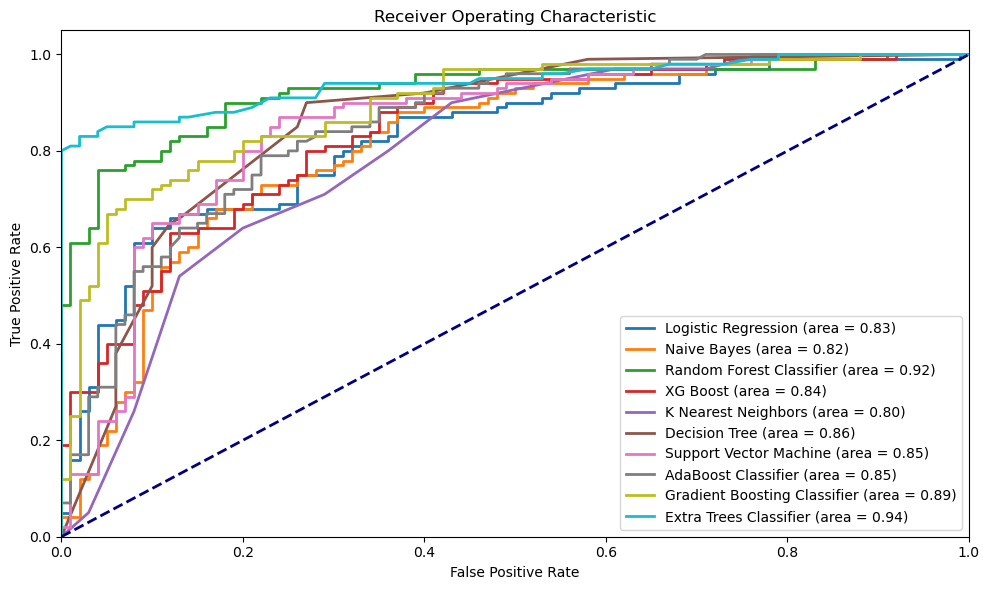

In [28]:
def plot_roc_curve(ax, y_true, y_score, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = roc_auc_score(y_true, y_score)
    ax.plot(fpr, tpr, lw=2, label='%s (area = %0.2f)' % (model_name, roc_auc))


fig, ax = plt.subplots(figsize=(10, 6))

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_score = model.predict_proba(x_test)[:, 1]
    plot_roc_curve(ax, y_test, y_score, model_name)


ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [29]:
best_model = grid_search.best_estimator_
best_model

ExtraTreesClassifier(n_estimators=50)

In [30]:
best_model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [31]:
pickle.dump(best_model,open('Diabetes_Model.pkl','wb'))
pickle.dump(scaler,open('Diabetes_Preprocessor.pkl','wb'))

# 6. Model File Testing

In [32]:
import pickle

model = pickle.load(open("../Artifacts/Diabetes_Disease/Diabetes_Model.pkl", "rb"))
processor = pickle.load(open("../Artifacts/Diabetes_Disease/Diabetes_Preprocessor.pkl", "rb"))

data = processor.transform([x_train[0]])
predictions = model.predict(data)

print(predictions)

[0]


# 7. Model Monitoring

### 7.1 Monitoring Data Preparation

In [33]:
target = 'Outcome'
prediction = 'prediction'
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
                      'Age']

In [34]:
column_mapping = ColumnMapping()
column_mapping.target = target
column_mapping.prediction = prediction
column_mapping.numerical_features = numerical_features

In [35]:
num_rows = int(len(df) * 0.70)

In [36]:
reference = df[:num_rows]
current = df[num_rows:]

In [37]:
classifier = ExtraTreesClassifier(n_estimators= 100)
classifier.fit(reference[numerical_features],reference[target])

ExtraTreesClassifier()

In [38]:
ref_prediction = classifier.predict(reference[numerical_features])
cur_prediction = classifier.predict(current[numerical_features])

In [39]:
reference['prediction'] = ref_prediction
current['prediction'] = cur_prediction

### 7.2 Model Performance Monitoring

In [40]:
classifier_per = Report(metrics=[ClassificationPreset()])
classifier_per.run(current_data=reference, reference_data=None, column_mapping=column_mapping)

In [41]:
classifier_per.show()

In [42]:
classifier_per.save("Model_Performance_Metrics.json")

### 7.3 Data Drift Monitoring

In [43]:
data_drift_report = Report(metrics=[DataDriftPreset()])
data_drift_report.run(reference_data=reference, current_data=current)

In [44]:
data_drift_report

In [45]:
data_drift_report.save("Data_Drift_Metrics.json")

### 7.4 Data Quality Monitoring

In [46]:
data_quality_report = Report(metrics=[DataQualityPreset()])
data_quality_report.run(reference_data=reference, current_data=current)

In [47]:
data_quality_report

In [48]:
data_quality_report.save("Data_Quality_Metrics.json")

### 7.5 Target Drift Monitoring

In [49]:
num_target_drift_report = Report(metrics=[TargetDriftPreset()])
num_target_drift_report.run(reference_data=reference, current_data=current)

In [50]:
num_target_drift_report

In [51]:
num_target_drift_report.save("Target_Drift_Metrics.json")